In [160]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

## You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [161]:
#Loading dataset
df = pd.read_csv('H:\Downloads\Holiday_Package.csv')

In [162]:
df.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [163]:
df.tail(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
862,863,no,66900,35,10,1,1,yes
863,864,no,35290,51,9,0,1,yes
864,865,no,25527,41,5,1,0,yes
865,866,yes,44057,35,9,0,2,yes
866,867,yes,22643,42,14,0,0,yes
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [166]:
#since Unnamed is just the serial number we can drop it.
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [167]:
#Checking for Duplicates
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [168]:
#Checking for Missing Values
df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [169]:
#checking shape of our data
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  872 
no. of columns:  7


## Understanding the variables of our data, their count.

In [170]:
df.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [171]:
df.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [172]:
df.age.value_counts()

44    35
31    32
34    32
35    31
33    30
28    29
40    29
36    28
38    28
32    27
47    26
41    26
39    25
26    24
42    24
46    24
49    23
45    23
51    22
50    21
37    21
43    21
48    20
27    19
29    19
30    19
57    18
56    18
55    17
25    17
58    16
24    16
59    14
54    14
52    13
21    12
23    11
53    10
60    10
22     9
61     8
20     8
62     3
Name: age, dtype: int64

In [173]:
df.educ.value_counts()

8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
21      1
18      1
1       1
Name: educ, dtype: int64

In [174]:
df.no_young_children.value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [175]:
df.no_older_children.value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

## Analysis of Continuous and Categorical variables

## Box plots of numerical data

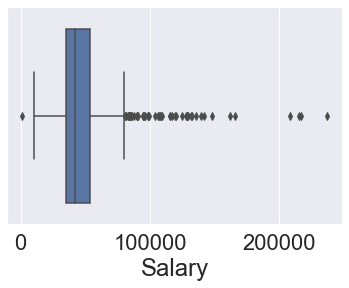

In [176]:
sns.boxplot(x='Salary', data=df);

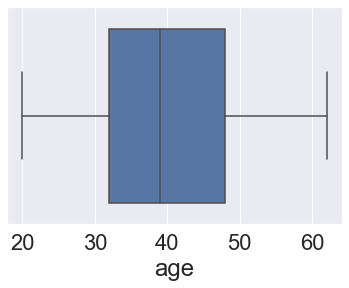

In [177]:
sns.boxplot(x='age', data=df);

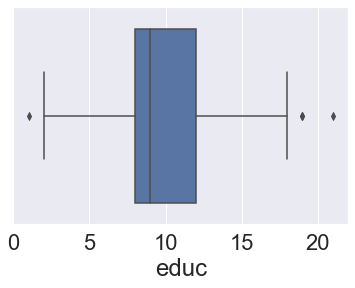

In [178]:
sns.boxplot(x='educ', data=df);

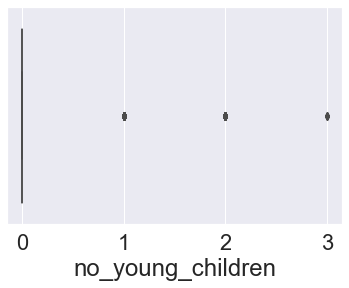

In [179]:
sns.boxplot(x='no_young_children', data=df);

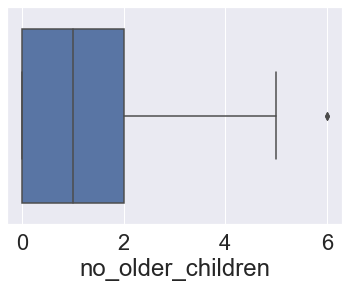

In [180]:
sns.boxplot(x='no_older_children', data=df);

In [181]:
#Treating outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [182]:
lr, ur =remove_outlier(df['Salary'])
df['Salary']=np.where(df['Salary']>ur,ur,df['Salary'])
df['Salary']=np.where(df['Salary']<lr,lr,df['Salary'])
print(lr)
print(ur)

8105.75
80687.75


C:\Users\balar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


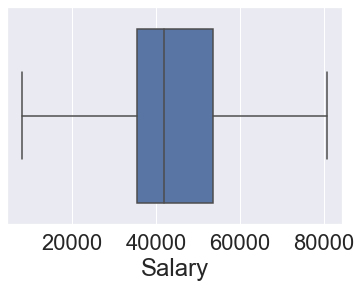

In [183]:
sns.boxplot(df['Salary']);

## visualizing categorical data

## Count plots

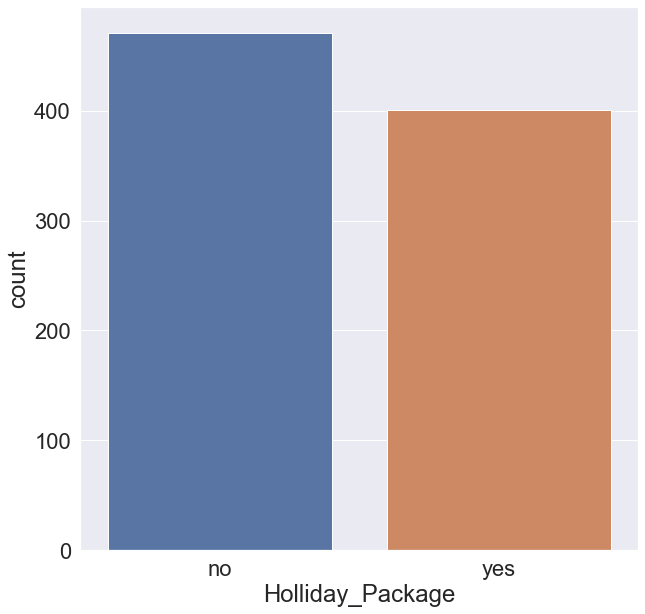

In [184]:
plt.figure(figsize=(10,10))
sns.countplot(x='Holliday_Package', data=df);

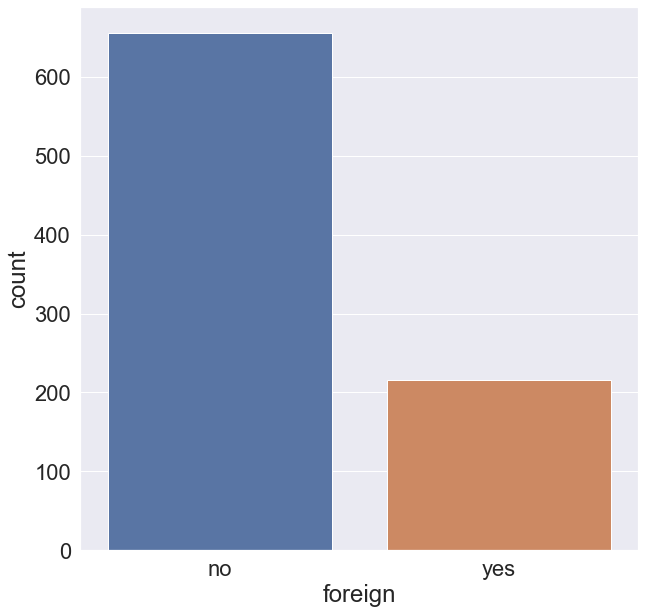

In [185]:
plt.figure(figsize=(10,10))
sns.countplot(x='foreign', data=df);

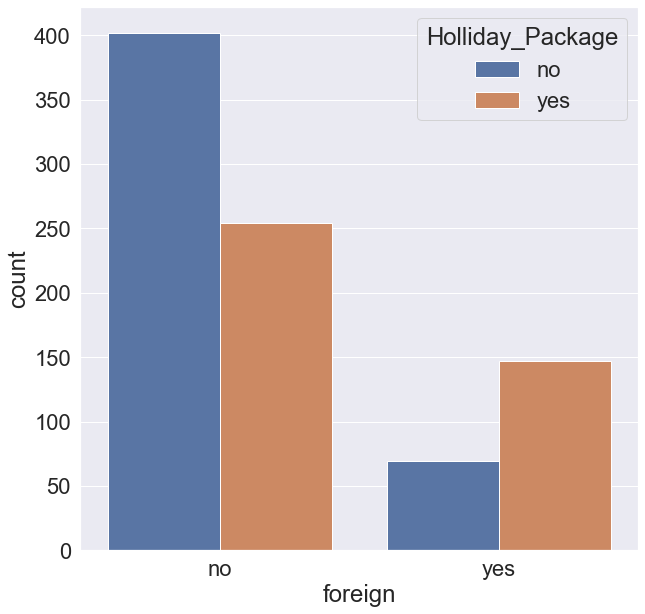

In [186]:
plt.figure(figsize=(10,10))
sns.countplot(x='foreign', data=df, hue='Holliday_Package');

## Plotting our independent variables against target variable

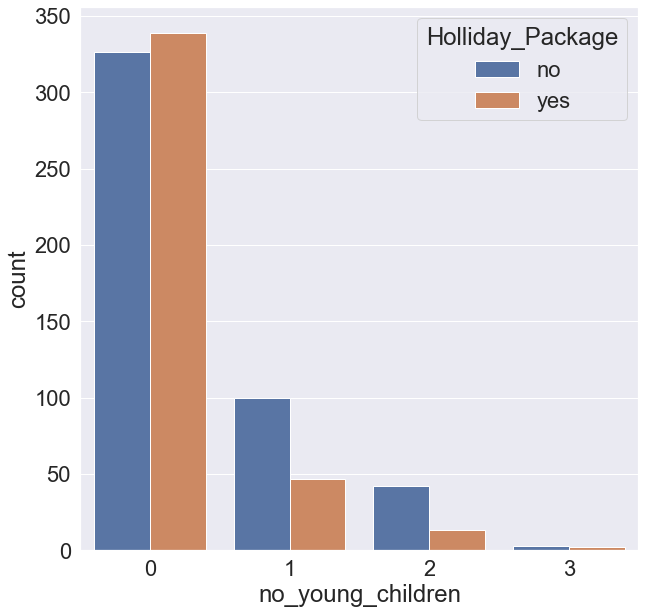

In [187]:
plt.figure(figsize=(10,10))
sns.countplot(x='no_young_children', data=df, hue='Holliday_Package');

In [188]:
pd.crosstab(df['no_young_children'],df['Holliday_Package'])

Holliday_Package,no,yes
no_young_children,,
0,326,339
1,100,47
2,42,13
3,3,2


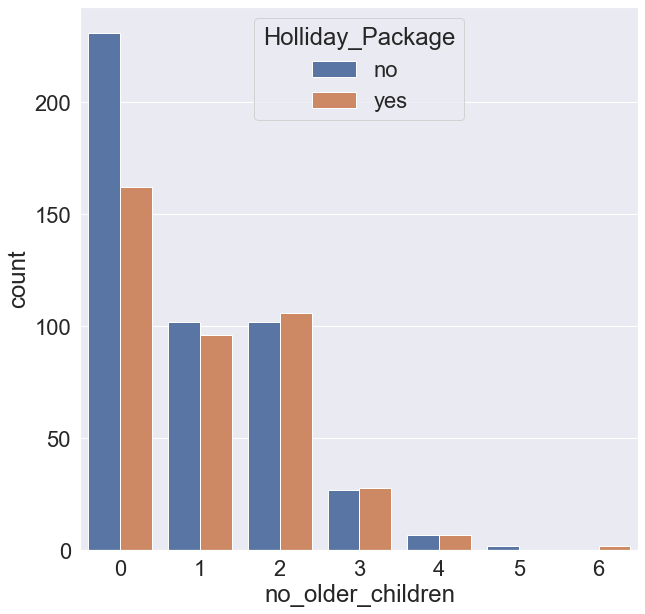

In [189]:
plt.figure(figsize=(10,10))
sns.countplot(x='no_older_children', data=df, hue='Holliday_Package');

In [190]:
pd.crosstab(df['no_older_children'],df['Holliday_Package'])

Holliday_Package,no,yes
no_older_children,,
0,231,162
1,102,96
2,102,106
3,27,28
4,7,7
5,2,0
6,0,2


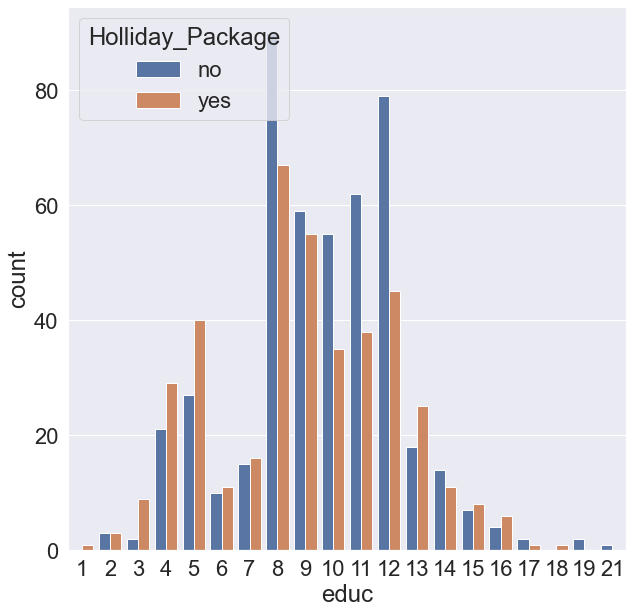

In [191]:
plt.figure(figsize=(10,10))
sns.countplot(x='educ', data=df, hue='Holliday_Package');

In [192]:
pd.crosstab(df['educ'],df['Holliday_Package'])

Holliday_Package,no,yes
educ,,
1,0,1
2,3,3
3,2,9
4,21,29
5,27,40
6,10,11
7,15,16
8,90,67
9,59,55


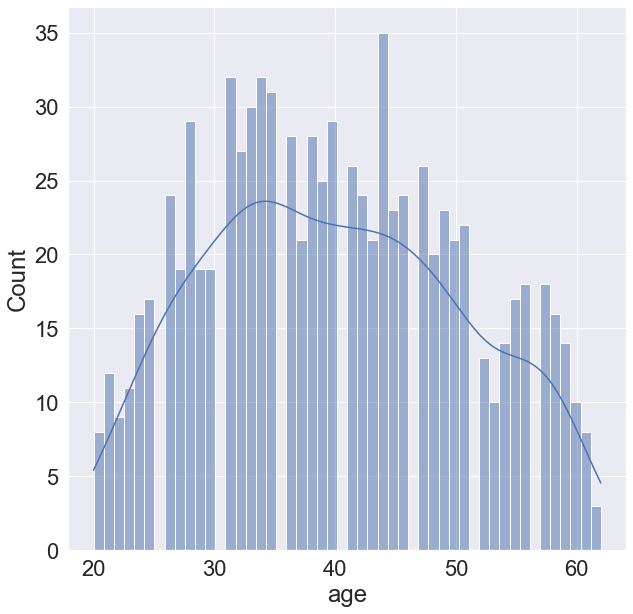

In [193]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='age', bins=50, kde=True);

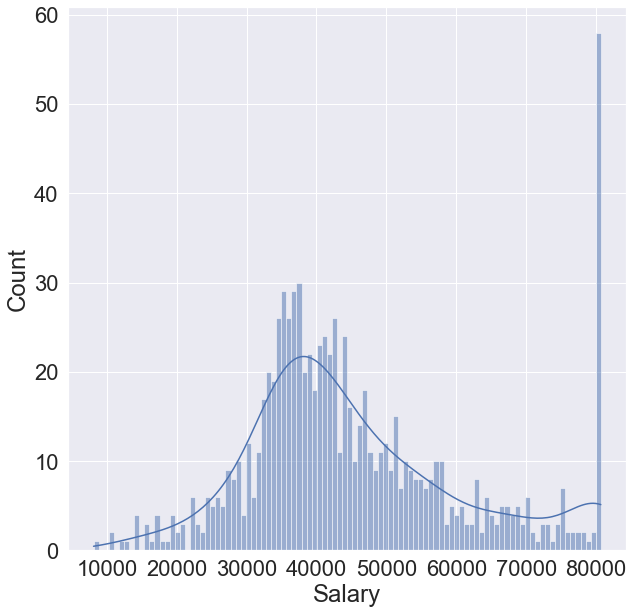

In [194]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='Salary', bins=100, kde=True);

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

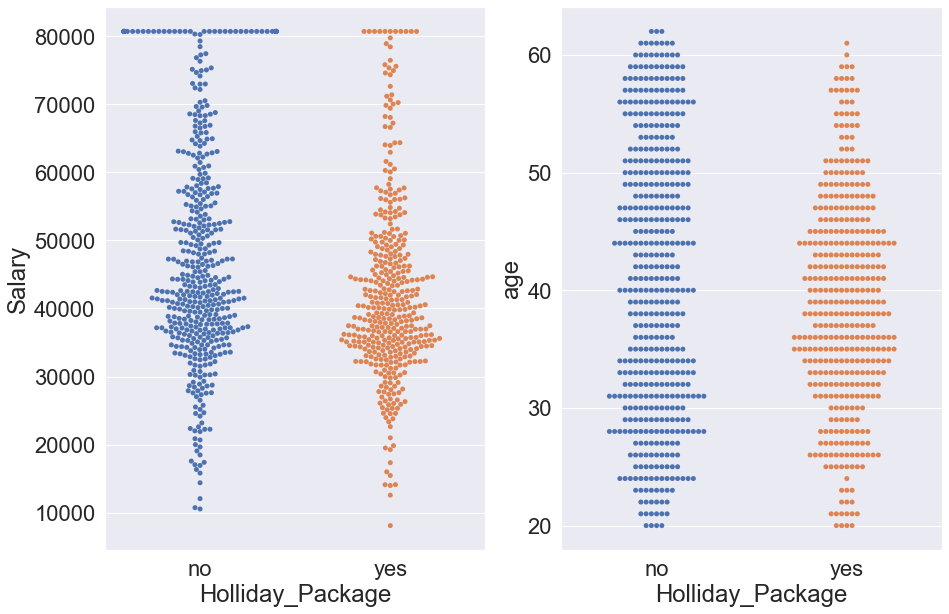

In [195]:
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.swarmplot(data=df,x='Holliday_Package', y='Salary')
plt.subplot(1,2,2)
sns.swarmplot(data=df,x='Holliday_Package', y='age')

## Correlation check for independent variables

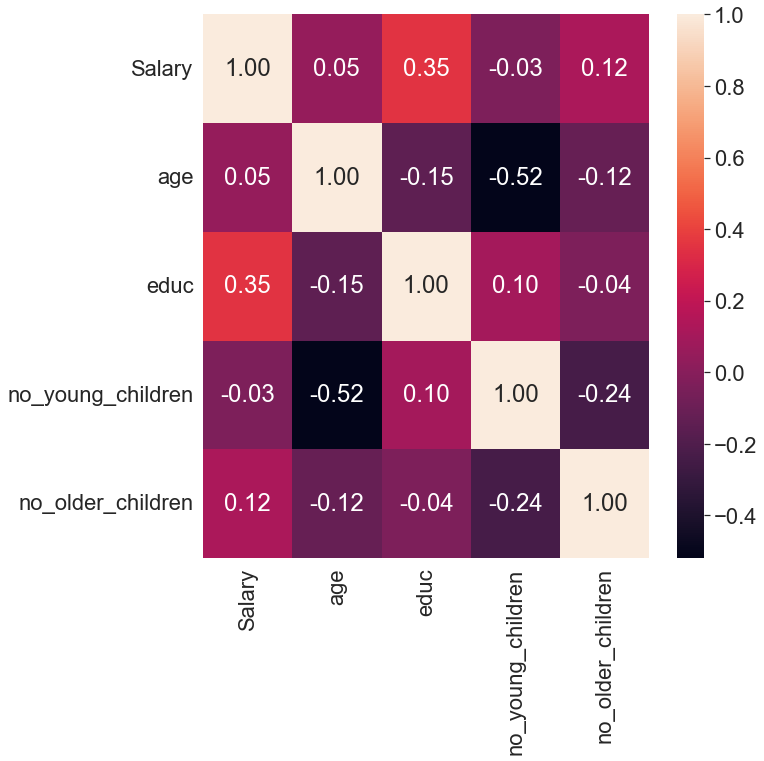

In [196]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

No correlation found between variables

<Figure size 1440x1440 with 0 Axes>

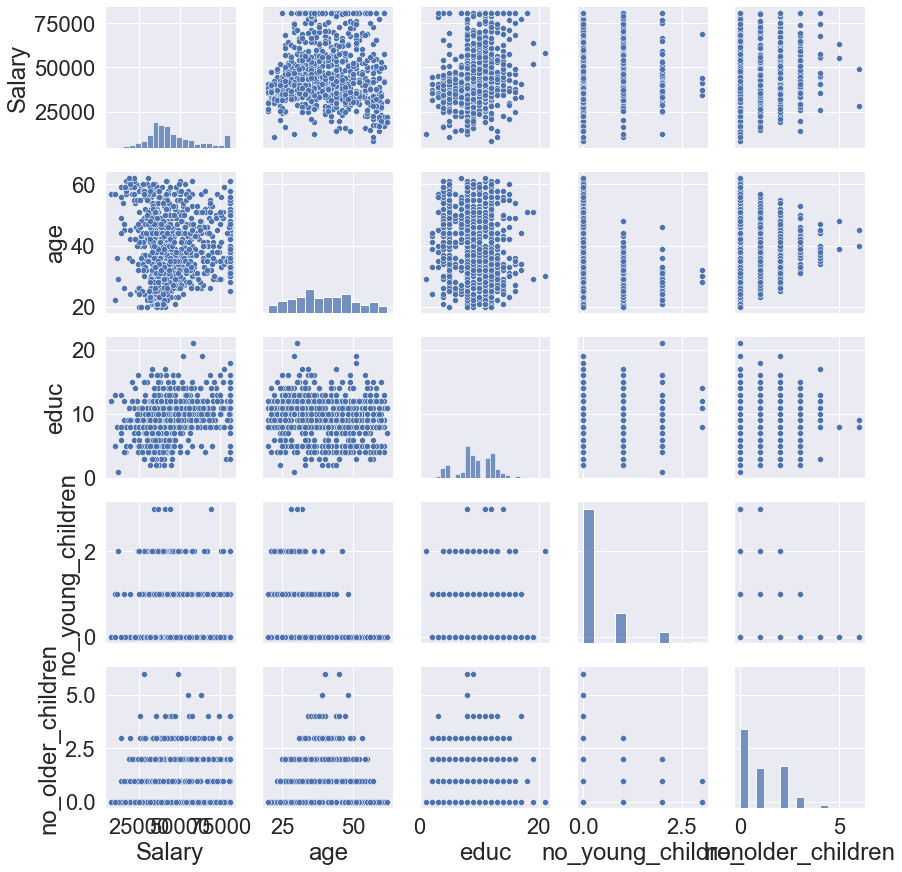

In [197]:
plt.figure(figsize=(20,20))
sns.pairplot(data=df);

## Coding our categorical data

In [198]:
df['Holliday_Package']=np.where(df['Holliday_Package']=='no','0',df['Holliday_Package'])
df['Holliday_Package']=np.where(df['Holliday_Package']=='yes','1',df['Holliday_Package'])

In [199]:
df['foreign']=np.where(df['foreign']=='no','0',df['foreign'])
df['foreign']=np.where(df['foreign']=='yes','1',df['foreign'])

In [200]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [201]:
#changing the object data type to int data type
df['Holliday_Package'] = df['Holliday_Package'].astype('int64')
df['foreign'] = df['foreign'].astype('int64')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int64  
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    int64  
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 47.8 KB


In [203]:
df_dummy = pd.get_dummies(df, columns=['foreign'],  drop_first=True)

In [204]:
df_dummy.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_1
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


# Splitting the data

In [205]:
# Prepare training and test data
X = df_dummy.drop('Holliday_Package', axis=1)
Y = df_dummy.pop('Holliday_Package')

In [206]:
#Train and Test the split data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.3, random_state=1, stratify=Y)

# Logistic Regression Model

In [207]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

## Predicting on Training and Test data

In [208]:
Ytrain_predict = model.predict(X_train)
Ytest_predict = model.predict(X_test)

## Getting the Predicted Classes and Probs

In [209]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

,0,1
0,0.677844,0.322156
1,0.534492,0.465508
2,0.691844,0.308156
3,0.487744,0.512256
4,0.571939,0.428061


## Linear Discriminant Analysis

In [210]:
#Build LDA Model
LDA = LinearDiscriminantAnalysis()
model=LDA.fit(X_train, Y_train)
model

LinearDiscriminantAnalysis()

## Prediction with Train and Test data

In [211]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

# Model Evaluation

## Logistic Regression Model

In [212]:
# Accuracy - Training Data
model.score(X_train, Y_train)

0.6622950819672131

# AUC and ROC for the training data

AUC: 0.731


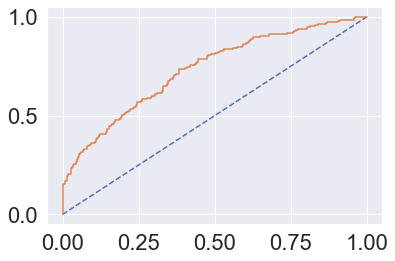

In [213]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [214]:
# Accuracy - Test Data
model.score(X_test, Y_test)

0.648854961832061

# AUC and ROC for the test data

AUC: 0.731


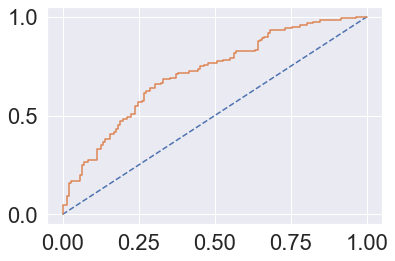

In [215]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Confusion Matrix for the training data

In [216]:
confusion_matrix(Y_train, Ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


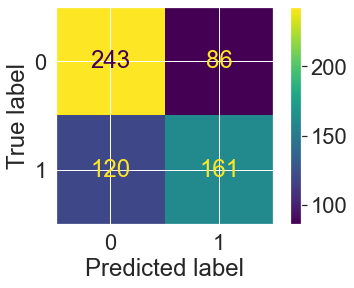

In [217]:
plot_confusion_matrix(model,X_train,Y_train);

In [218]:
print(classification_report(Y_train, Ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



# Confusion Matrix for test data

In [219]:
confusion_matrix(Y_test, Ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

C:\Users\balar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


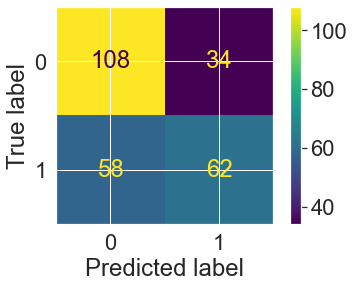

In [220]:
plot_confusion_matrix(model,X_test,Y_test);

In [221]:
print(classification_report(Y_test, Ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



## Linear Discriminant Analysis

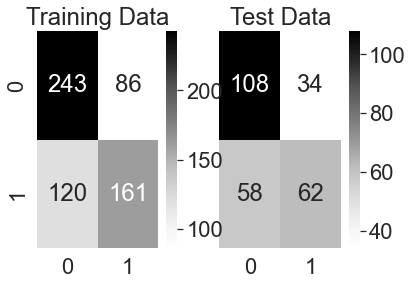

In [222]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

## Training Data and Test Data Classification Report Comparison

In [223]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



## Probability prediction for the training and test data

In [224]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


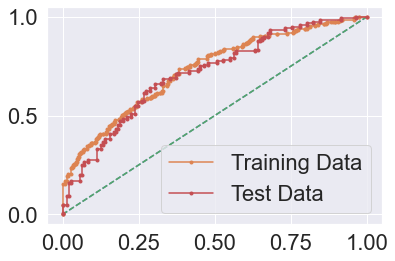

In [225]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## 2.4 Inference:

0.1 

Accuracy Score 0.4738
F1 Score 0.6356 

Confusion Matrix


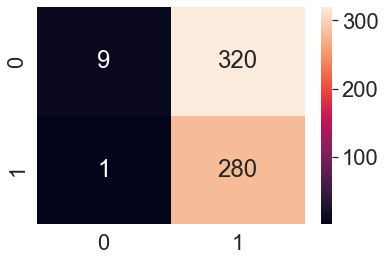

0.2 

Accuracy Score 0.523
F1 Score 0.6498 

Confusion Matrix


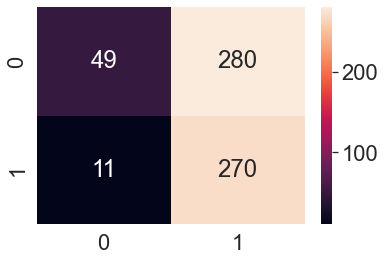

0.3 

Accuracy Score 0.6066
F1 Score 0.6774 

Confusion Matrix


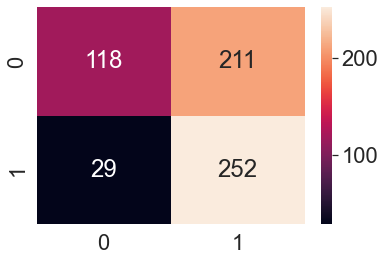

0.4 

Accuracy Score 0.6623
F1 Score 0.6677 

Confusion Matrix


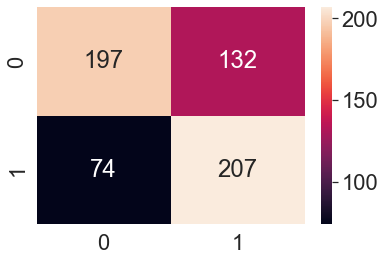

0.5 

Accuracy Score 0.6623
F1 Score 0.6098 

Confusion Matrix


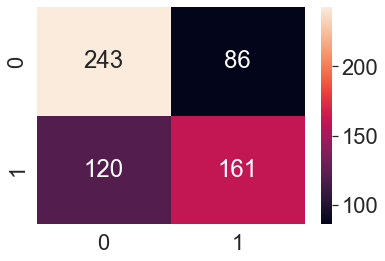

0.6 

Accuracy Score 0.6508
F1 Score 0.5192 

Confusion Matrix


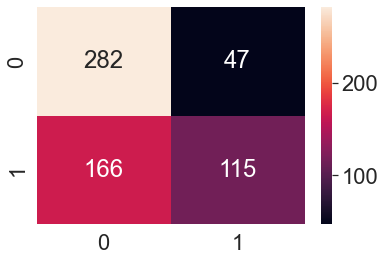

0.7 

Accuracy Score 0.6426
F1 Score 0.4263 

Confusion Matrix


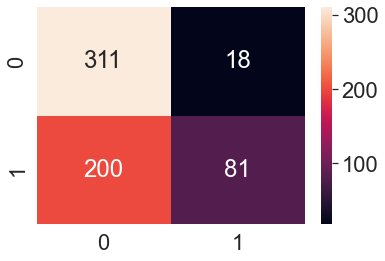

0.8 

Accuracy Score 0.5902
F1 Score 0.2038 

Confusion Matrix


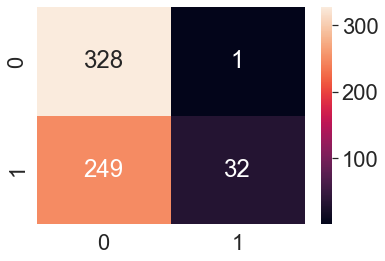

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


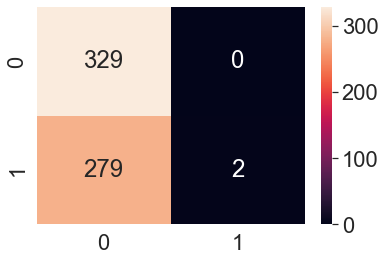

In [226]:
for j in np.arange(0.1,1,0.1):
    Holidaypackage_prob = j 
    Holidaypackage_cutoff_data=[]
    for i in range(0,len(Y_train)):
        if np.array(pred_prob_train[:,1])[i] > Holidaypackage_prob: 
            a=1
        else:
            a=0
        Holidaypackage_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,Holidaypackage_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,Holidaypackage_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,Holidaypackage_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [227]:
#Predicting the classes on the test data

data_pred_Holidaypackage_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_Holidaypackage_cutoff.append(a)

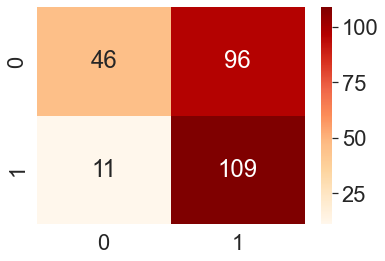

In [228]:
sns.heatmap((metrics.confusion_matrix(Y_test,data_pred_Holidaypackage_cutoff)),annot=True,fmt='.5g',cmap='OrRd');

In [229]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(Y_test,pred_class_test),'\n\n\n')
print('Classification Report of the Holidaypackage cut-off test data:\n\n',metrics.classification_report(Y_test,data_pred_Holidaypackage_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



Classification Report of the Holidaypackage cut-off test data:

               precision    recall  f1-score   support

           0       0.81      0.32      0.46       142
           1       0.53      0.91      0.67       120

    accuracy                           0.59       262
   macro avg       0.67      0.62      0.57       262
weighted avg       0.68      0.59      0.56       262
 



In [230]:
print('Good day')

Good day
